**Fish Pixel to Cm converter**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from joblib import Parallel, delayed
import joblib


 **Loading the dataset**

In [3]:
dataset=pandas.read_csv("gdrive/MyDrive/2022-Fish Biomass/Dataset/Final Dataset/dataset_final.csv")

In [ ]:
dataset

,Unnamed: 0.1,Unnamed: 0,_xtl,_ytl,_xbr,_ybr,depth,length_cm,width_cm,biomass_mg,label,length_pix,width_pix,turbidity
0,0,0,1219.96,690.74,1920.00,1023.50,46.661239,20.0,10.6,126.0,NaN,700.04,332.76,10.686298
1,1,1,1218.87,690.74,1918.92,1023.50,46.596766,20.0,10.6,126.0,NaN,700.05,332.76,14.917709
2,2,2,1217.79,690.74,1917.83,1023.50,45.134771,20.0,10.6,126.0,NaN,700.04,332.76,10.709706
3,3,3,1216.71,690.74,1916.75,1023.50,46.344511,20.0,10.6,126.0,NaN,700.04,332.76,12.740902
4,4,4,1215.62,690.74,1915.67,1023.50,45.370098,20.0,10.6,126.0,NaN,700.05,332.76,10.202941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,11281,11281,542.64,322.79,1017.86,488.69,29.915848,14.1,7.8,47.0,29.0,475.22,165.90,12.812684
11282,11282,11282,567.13,410.74,940.00,571.02,30.707346,9.7,5.9,17.0,30.0,372.87,160.28,11.856356
11283,11283,11283,537.08,377.35,921.10,541.00,30.288012,9.7,5.8,17.0,30.0,384.02,163.65,10.506233
11284,11284,11284,519.27,398.50,903.30,565.50,30.677551,9.7,6.1,17.0,30.0,384.03,167.00,10.739388


**Spliting the dataset into Training and testing**

In [4]:
X = dataset[['length_pix', 'width_pix','depth']]
y = dataset[['length_cm','width_cm']]

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=1)

In [ ]:
X_train

,length_pix,width_pix,depth
3289,646.69,302.50,46.594241
8324,149.10,128.24,41.822576
2619,896.05,340.81,45.944120
6686,315.36,216.54,47.827720
6955,272.06,218.30,47.834067
...,...,...,...
7813,244.02,112.95,42.150575
10955,175.18,123.00,41.537413
905,856.47,367.13,45.178603
5192,275.40,213.09,47.121788


In [ ]:
y_train

,length_cm,width_cm
3289,20.0,10.6
8324,8.0,4.5
2619,20.0,10.6
6686,13.5,6.9
6955,13.5,6.9
...,...,...
7813,8.0,4.5
10955,8.0,4.5
905,20.0,10.6
5192,13.5,6.9


**Applying Grid Search to find out the model suitable for our dataset**


In [ ]:
regressors = [
    KNeighborsRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 8
for model in regressors[:head]:
    start = time()
    # define the direct multioutput wrapper model
    wrapper = MultiOutputRegressor(model)
    # fit the model on the whole dataset
    wrapper.fit(X, y)
    #model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = wrapper.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tMAE/R2_score:",mean_absolute_error(y_test, y_pred)/r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.027s
	Prediction time: 0.012s
	Explained variance: 0.9975334826713818
	Mean absolute error: 0.022178919397697075
	R2 score: 0.9975323607399593
	MAE/R2_score: 0.02223378435687538

RandomForestRegressor()
	Training time: 2.986s
	Prediction time: 0.032s
	Explained variance: 0.9989923154307987
	Mean absolute error: 0.01529915854744283
	R2 score: 0.9989918138831134
	MAE/R2_score: 0.01531459851304938

LinearRegression()
	Training time: 0.047s
	Prediction time: 0.004s
	Explained variance: 0.8991080922082397
	Mean absolute error: 0.9124751047271176
	R2 score: 0.8990885236528673
	MAE/R2_score: 1.0148890578870504

Lasso()
	Training time: 0.019s
	Prediction time: 0.004s
	Explained variance: 0.89228193858794
	Mean absolute error: 0.975687147662883
	R2 score: 0.8922439506015376
	MAE/R2_score: 1.0935206083550235

Ridge()
	Training time: 0.014s
	Prediction time: 0.008s
	Explained variance: 0.8991080924445811
	Mean absolute error: 0.9124763180773172
	R2 score: 0

In [ ]:
model = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV                 
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
    },
    scoring='r2',
    cv=5
)
grid_result = gsc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.995083 using {'criterion': 'absolute_error', 'n_estimators': 100}


In [ ]:
model = RandomForestRegressor(**grid_result.best_params_)

model.fit(X_train, y_train)


RandomForestRegressor(criterion='absolute_error')

In [ ]:
joblib.dump(model, '/content/gdrive/MyDrive/2022-Fish Biomass/CODE/p_cm.pkl')
y_pred=model.predict(X_test)
y_pred

array([[ 8. ,  4.5],
       [20. , 10.6],
       [13.5,  6.9],
       ...,
       [ 8. ,  4.5],
       [13.5,  6.9],
       [20. , 10.6]])

In [ ]:
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

	Mean absolute error: 0.03854007971656733
	R2 score: 0.9934991038250991


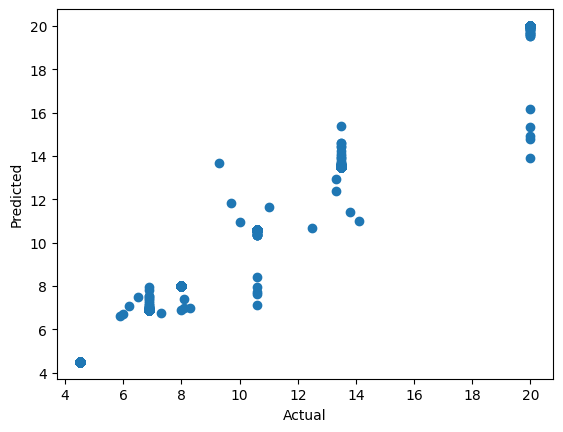

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [6]:
p_cm_converter= joblib.load('/content/gdrive/MyDrive/2022-Fish Biomass/CODE/p_cm.pkl')
pcm_res=p_cm_converter.predict(X_test)
print(X_test,pcm_res)

       length_pix  width_pix      depth
9722       267.07     135.13  41.520729
2932       680.06     270.10  45.570270
4980       287.60     209.60  46.015136
1587       914.06     365.42  46.307159
8945       161.55     128.24  41.315600
...           ...        ...        ...
8197       362.23     152.50  42.619657
8231       350.96     146.44  41.631811
10190      335.16     123.00  41.645160
4701       326.16     176.74  46.482800
3706       332.85     330.26  45.569901

[1129 rows x 3 columns] [[ 8.   4.5]
 [20.  10.6]
 [13.5  6.9]
 ...
 [ 8.   4.5]
 [13.5  6.9]
 [20.  10.6]]


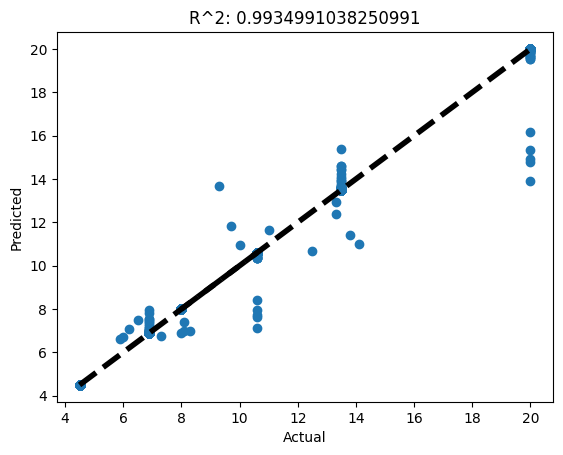

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, pcm_res)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line

#ax.plot(y_test, depth_result)
ax.set_title('R^2: ' + str(r2_score(y_test, pcm_res)))
plt.show()